In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 40
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | On a recent flight from Cy...
1,✅ Trip Verified | Flight BA 0560 arrived in ...
2,✅ Trip Verified | This was the first time I ...
3,✅ Trip Verified | Pretty good flight but sti...
4,"✅ Trip Verified | Check in was fine, but no pr..."


In [4]:
df.to_csv("/content/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df = pd.read_csv("/content/BA_reviews.csv")

In [6]:
df

,Unnamed: 0,reviews
0,0,✅ Trip Verified | On a recent flight from Cy...
1,1,✅ Trip Verified | Flight BA 0560 arrived in ...
2,2,✅ Trip Verified | This was the first time I ...
3,3,✅ Trip Verified | Pretty good flight but sti...
4,4,"✅ Trip Verified | Check in was fine, but no pr..."
...,...,...
3898,3898,Flew LHR - VIE return operated by bmi but BA a...
3899,3899,LHR to HAM. Purser addresses all club passenge...
3900,3900,My son who had worked for British Airways urge...
3901,3901,London City-New York JFK via Shannon on A318 b...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3903 entries, 0 to 3902
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3903 non-null   int64 
 1   reviews     3903 non-null   object
dtypes: int64(1), object(1)
memory usage: 61.1+ KB


## Exploratory Data Analysis (EDA)

In [8]:
# show the full row content
pd.set_option('max_colwidth', None)

df.sample(n=2)

,Unnamed: 0,reviews
2748,2748,Our first flight in an A380 and not disappointed. The aircraft still seemed new and a bit if a culture shock after so many years travelling in rather well used BA 777s and 747s. The first class cabin was spacious with large and very private seating. The aircraft is also very quiet. Service from the staff was attentive and friendly.
1484,1484,"✅ Trip Verified | I flew British Airways from Miami to Heathrow on an Airbus A380. The Premium Economy cabin is located on the upper deck. I had a side seat with no one sitting next to me. Boarding was smooth and we left on time. Food and drink was fine apart from breakfast which consisted of a cream cheese roll, which is not very pleasant any time and certainly not early in morning and a granary bar which I didn't eat, my dog liked it when I got home. For the price, you would expect a better meal. IFE was fine. Crew good.\r\n"


In [9]:
import pandas as pd
import re

df = pd.read_csv("/content/BA_reviews.csv")

def clean_text(text):
  text = text.lower()  # Convert to lowercase
  text = re.sub(r'✅ trip verified', '', text)  # Remove "✅ Trip Verified"
  text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
  return text

df['cleaned_reviews'] = df['reviews'].apply(clean_text)

In [10]:
df.sample(2)

,Unnamed: 0,reviews,cleaned_reviews
2229,2229,"✅ Verified Review | I hadn't flown British Airways in a while but I thought I'd give them a go again. I was in Club World, seat 64K upper deck from London Heathrow to Chicago. Let me begin by saying that BA crews are tremendous. They are friendly, approachable, professional, amiable and affable. The flight deck did a great job in getting us there safely and they were informative without being over bearing with their announcements. The service on board was very good, the food was plentiful and quite tasty. The inflight entertainment was excellent. Loads of choices and great quality. All in all a great experience. Based on that, I will keep flying BA for my transatlantic flights. Again, the crews are a credit to BA, they do a great a job.",verified review i hadnt flown british airways in a while but i thought id give them a go again i was in club world seat 64k upper deck from london heathrow to chicago let me begin by saying that ba crews are tremendous they are friendly approachable professional amiable and affable the flight deck did a great job in getting us there safely and they were informative without being over bearing with their announcements the service on board was very good the food was plentiful and quite tasty the inflight entertainment was excellent loads of choices and great quality all in all a great experience based on that i will keep flying ba for my transatlantic flights again the crews are a credit to ba they do a great a job
3714,3714,BA206 from Miami to LHR on upper deck dinner took over 3 hours to complete. 2 staff obviously not sufficient. Very old 747 TV screens going from colour to B&W frustrating as had more than enough time to watch a couple of movies while dinner was not served.,ba206 from miami to lhr on upper deck dinner took over 3 hours to complete 2 staff obviously not sufficient very old 747 tv screens going from colour to bw frustrating as had more than enough time to watch a couple of movies while dinner was not served


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3903 entries, 0 to 3902
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3903 non-null   int64 
 1   reviews          3903 non-null   object
 2   cleaned_reviews  3903 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.6+ KB


## Removing Stopwords

In [12]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  words = text.split()
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return " ".join(filtered_words)

df['reviews_no_stopwords'] = df['cleaned_reviews'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df.sample(2)

,Unnamed: 0,reviews,cleaned_reviews,reviews_no_stopwords
1273,1273,"✅ Trip Verified | London to Vienna. I was shocked that BA provides buy onboard short haul flights - no free water, coffee or tea. I tried to buy something but my Credit Card wouldn't work, and I could not pay with cash.",london to vienna i was shocked that ba provides buy onboard short haul flights no free water coffee or tea i tried to buy something but my credit card wouldnt work and i could not pay with cash,london vienna shocked ba provides buy onboard short haul flights free water coffee tea tried buy something credit card wouldnt work could pay cash
1542,1542,"✅ Trip Verified | London to New York. Aircraft was very dated, IFE poor, meal service average, no snacks, poor drinks service, crew exceedingly unfriendly and customer service after the flight abysmal. Seats on these aircraft which have not been refreshed are beyond threadbare and we’re outdated a decade ago. The meal service has taken a severe cut in recent years. To top everything off the crew couldn’t even provide a sincere smile or feign the slightest interest - embarrassing! When you tell BA about a negative experience they’ll waffle on about how great they are but fail to resolve the complaint - absolute waste of time - don’t waste your money flying BA - I’ve had far more positive experiences on Ryanair.",london to new york aircraft was very dated ife poor meal service average no snacks poor drinks service crew exceedingly unfriendly and customer service after the flight abysmal seats on these aircraft which have not been refreshed are beyond threadbare and were outdated a decade ago the meal service has taken a severe cut in recent years to top everything off the crew couldnt even provide a sincere smile or feign the slightest interest embarrassing when you tell ba about a negative experience theyll waffle on about how great they are but fail to resolve the complaint absolute waste of time dont waste your money flying ba ive had far more positive experiences on ryanair,london new york aircraft dated ife poor meal service average snacks poor drinks service crew exceedingly unfriendly customer service flight abysmal seats aircraft refreshed beyond threadbare outdated decade ago meal service taken severe cut recent years top everything crew couldnt even provide sincere smile feign slightest interest embarrassing tell ba negative experience theyll waffle great fail resolve complaint absolute waste time dont waste money flying ba ive far positive experiences ryanair


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3903 entries, 0 to 3902
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            3903 non-null   int64 
 1   reviews               3903 non-null   object
 2   cleaned_reviews       3903 non-null   object
 3   reviews_no_stopwords  3903 non-null   object
dtypes: int64(1), object(3)
memory usage: 122.1+ KB


## Lemmatization

In [15]:
import spacy

nlp = spacy.load('en_core_web_sm')

def text_lemmatize(text):
  doc = nlp(text)
  result = ' '.join([token.lemma_ for token in doc])
  return result

df['lemmatized_review'] = df.reviews_no_stopwords.apply(lambda x: text_lemmatize(x))

In [16]:
df.sample(2)

,Unnamed: 0,reviews,cleaned_reviews,reviews_no_stopwords,lemmatized_review
535,535,"✅ Trip Verified | Customer service is non-existent. For over a week customer service number message said to call back in a couple weeks. Nothing we needed to accomplish could be done on BA.com I was flying to Nairobi to bring my sister back after her husband died suddenly, My sister and husband had tickets on the July 18 from Nairobi to JFK. When BA received the death certificate, they cancelled my sister's ticket, not once but twice. It took almost 5 weeks to correct this incompetence. My niece and my wife were on the phone for hours plus hold times. 8 times we were told by the web help number we would get a return call and no one ever called back. The ticket was in premium economy. When I tried to upgrade to be with my broken- hearted sister, the price was $4029.00 plus a $25.00 service fee. Where is the efficiency? Where is the empathy? Where is the decency? In addition to the stress of losing her husband, my sister had to go through totally unnecessary stress of not having a ticket until 7 days before her flight. Also when I made my reservation, i was given a price and within 10 seconds was told there was a $1400.00 increase. British Airways has taken a nosedive in my opinion. Words simply don't convey my very deep frustration and disappointment with the company",customer service is nonexistent for over a week customer service number message said to call back in a couple weeks nothing we needed to accomplish could be done on bacom i was flying to nairobi to bring my sister back after her husband died suddenly my sister and husband had tickets on the july 18 from nairobi to jfk when ba received the death certificate they cancelled my sisters ticket not once but twice it took almost 5 weeks to correct this incompetence my niece and my wife were on the phone for hours plus hold times 8 times we were told by the web help number we would get a return call and no one ever called back the ticket was in premium economy when i tried to upgrade to be with my broken hearted sister the price was 402900 plus a 2500 service fee where is the efficiency where is the empathy where is the decency in addition to the stress of losing her husband my sister had to go through totally unnecessary stress of not having a ticket until 7 days before her flight also when i made my reservation i was given a price and within 10 seconds was told there was a 140000 increase british airways has taken a nosedive in my opinion words simply dont convey my very deep frustration and disappointment with the company,customer service nonexistent week customer service number message said call back couple weeks nothing needed accomplish could done bacom flying nairobi bring sister back husband died suddenly sister husband tickets july 18 nairobi jfk ba received death certificate cancelled sisters ticket twice took almost 5 weeks correct incompetence niece wife phone hours plus hold times 8 times told web help number would get return call one ever called back ticket premium economy tried upgrade broken hearted sister price 402900 plus 2500 service fee efficiency empathy decency addition stress losing husband sister go totally unnecessary stress ticket 7 days flight also made reservation given price within 10 seconds told 140000 increase british airways taken nosedive opinion words simply dont convey deep frustration disappointment company,customer service nonexistent week customer service number message say call back couple week nothing need accomplish could done bacom fly nairobi bring sister back husband die suddenly sister husband ticket july 18 nairobi jfk ba receive death certificate cancel sister ticket twice take almost 5 week correct incompetence niece wife phone hour plus hold time 8 time tell web help number would get return call one ever call back ticket premium economy try upgrade break hearted sister price 402900 plus 2500 service fee efficiency empathy decency addition s

In [17]:
frequent_words = ['british', 'airways', 'fly', 'flight','ba','london']
def remove_frequent_words(text):
  result = ' '.join([word for word in text.split() if word not in frequent_words])

  return result

df['final_review'] = df.lemmatized_review.apply(remove_frequent_words)

In [18]:
df.sample(2)

,Unnamed: 0,reviews,cleaned_reviews,reviews_no_stopwords,lemmatized_review,final_review
307,307,"✅ Trip Verified | In Nov 2022 I booked and paid for a return journey to New Zealand. On my return journey my final flight was from London to Edinburgh. On trying to check in I was told my ticket ‘did not exist’. I showed evidence of my flight being booked and paid for but was denied a ticket. My only option was to buy a ticket for a later flight which cost £265.07. Since Nov 22, ie, 8 months ago, I have communicated multiple times with BA in an attempt to have my money returned. They have admitted responsibility for their error which cost me £265. I finally received word from them that they have decided to refund me the sum of £32.14. I have asked for an explanation but have received none, only a polite e mail informing me that the decision was checked and was correct. I do not intend to let this matter go. A company worth billions of pounds will not return an honest refund. PS, they also lost my luggage and did nothing to help me retrieve it. I tracked it down myself a week later to Edinburgh airport and picked it up myself.",in nov 2022 i booked and paid for a return journey to new zealand on my return journey my final flight was from london to edinburgh on trying to check in i was told my ticket did not exist i showed evidence of my flight being booked and paid for but was denied a ticket my only option was to buy a ticket for a later flight which cost 26507 since nov 22 ie 8 months ago i have communicated multiple times with ba in an attempt to have my money returned they have admitted responsibility for their error which cost me 265 i finally received word from them that they have decided to refund me the sum of 3214 i have asked for an explanation but have received none only a polite e mail informing me that the decision was checked and was correct i do not intend to let this matter go a company worth billions of pounds will not return an honest refund ps they also lost my luggage and did nothing to help me retrieve it i tracked it down myself a week later to edinburgh airport and picked it up myself,nov 2022 booked paid return journey new zealand return journey final flight london edinburgh trying check told ticket exist showed evidence flight booked paid denied ticket option buy ticket later flight cost 26507 since nov 22 ie 8 months ago communicated multiple times ba attempt money returned admitted responsibility error cost 265 finally received word decided refund sum 3214 asked explanation received none polite e mail informing decision checked correct intend let matter go company worth billions pounds return honest refund ps also lost luggage nothing help retrieve tracked week later edinburgh airport picked,nov 2022 book pay return journey new zealand return journey final flight london edinburgh try check tell ticket exist show evidence flight book pay deny ticket option buy ticket later flight cost 26507 since nov 22 ie 8 month ago communicate multiple time ba attempt money return admit responsibility error cost 265 finally receive word decide refund sum 3214 ask explanation receive none polite e mail inform decision check correct intend let matter go company worth billion pound return honest refund ps also lose luggage nothing help retrieve track week later edinburgh airport pick,nov 2022 book pay return journey new zealand return journey final edinburgh try check tell ticket exist show evidence book pay deny ticket option buy ticket later cost 26507 since nov 22 ie 8 month ago communicate multiple time attempt money return admit responsibility error cost 265 finally receive word decide refund sum 3214 ask explanation receive none polite e mail inform decision check correct intend let matter go company worth billion pound return honest refund ps also lose luggage nothing help retrieve track week later edinburgh airport pick
780,780,"Not Verified | I booked my honeymoon flight from San Diego to Barcelona in September 202

In [19]:
from textblob import TextBlob

def get_sentiment(text):
  analysis = TextBlob(text)
  return analysis.sentiment.polarity

df['sentiment'] = df['final_review'].apply(get_sentiment)

In [20]:
df.sample(2)

,Unnamed: 0,reviews,cleaned_reviews,reviews_no_stopwords,lemmatized_review,final_review,sentiment
81,81,"Not Verified | On March 1st, I flew from Berlin to São Paulo with BA but encountered several issues. My first flight was delayed by several hours, causing me to miss my connection at London Heathrow. Upon arriving at the airport after midnight, I was given a hotel voucher. However, the hotel designated by BA rudely denied me check-in, claiming it was fully booked. I had to return to Heathrow at 1 AM and found a different hotel, paying for the taxi out of my own pocket. As a result of these complications, I arrived in São Paulo more than 24 hours late. Despite my efforts to assert my rights and seek reimbursement for the taxi, BA's customer service has been extremely poor. Their phone lines are non-functional, emails are only answered automatically, and the appropriate channels for such requests have not been responsive since the first week of March. This experience has left me extremely disappointed, especially considering the high standard of service I once associated with BA.",not verified on march 1st i flew from berlin to são paulo with ba but encountered several issues my first flight was delayed by several hours causing me to miss my connection at london heathrow upon arriving at the airport after midnight i was given a hotel voucher however the hotel designated by ba rudely denied me checkin claiming it was fully booked i had to return to heathrow at 1 am and found a different hotel paying for the taxi out of my own pocket as a result of these complications i arrived in são paulo more than 24 hours late despite my efforts to assert my rights and seek reimbursement for the taxi bas customer service has been extremely poor their phone lines are nonfunctional emails are only answered automatically and the appropriate channels for such requests have not been responsive since the first week of march this experience has left me extremely disappointed especially considering the high standard of service i once associated with ba,verified march 1st flew berlin são paulo ba encountered several issues first flight delayed several hours causing miss connection london heathrow upon arriving airport midnight given hotel voucher however hotel designated ba rudely denied checkin claiming fully booked return heathrow 1 found different hotel paying taxi pocket result complications arrived são paulo 24 hours late despite efforts assert rights seek reimbursement taxi bas customer service extremely poor phone lines nonfunctional emails answered automatically appropriate channels requests responsive since first week march experience left extremely disappointed especially considering high standard service associated ba,verify march 1st fly berlin são paulo ba encounter several issue first flight delay several hour cause miss connection london heathrow upon arrive airport midnight give hotel voucher however hotel designate ba rudely deny checkin claim fully book return heathrow 1 find different hotel pay taxi pocket result complication arrive são paulo 24 hour late despite effort assert right seek reimbursement taxi bas customer service extremely poor phone line nonfunctional email answer automatically appropriate channel request responsive since first week march experience leave extremely disappointed especially consider high standard service associate ba,verify march 1st berlin são paulo encounter several issue first delay several hour cause miss connection heathrow upon arrive airport midnight give hotel voucher however hotel designate rudely deny checkin claim fully book return heathrow 1 find different hotel pay taxi pocket result complication arrive são paulo 24 hour late despite effort assert right seek reimbursement taxi bas customer service extremely poor phone line nonfunctional email answer automatically appropriate channel request responsive since first week march experience leave extremely disappointed especially consider high 

In [21]:
def categorize_sentiment(score):
        if score > 0 :
            return 'positive'
        elif score < 0:
            return 'negative'
        else:
            return 'neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

In [22]:
df.sample(2)

,Unnamed: 0,reviews,cleaned_reviews,reviews_no_stopwords,lemmatized_review,final_review,sentiment,sentiment_category
445,445,"✅ Trip Verified | A rather empty and quiet flight to Tel Aviv, very friendly cabin crew and due to the emptiness of the flight I had an entire row to myself which allowed me to work easily and have as much space as required. Unfortunately upon landing the breaks overheated and we had to wait for the fire crew to cool them down which delayed us. Otherwise an overall excellent flight on BA's part. This was the first time I have flown this flight and it has actually taken off at the correct time.",a rather empty and quiet flight to tel aviv very friendly cabin crew and due to the emptiness of the flight i had an entire row to myself which allowed me to work easily and have as much space as required unfortunately upon landing the breaks overheated and we had to wait for the fire crew to cool them down which delayed us otherwise an overall excellent flight on bas part this was the first time i have flown this flight and it has actually taken off at the correct time,rather empty quiet flight tel aviv friendly cabin crew due emptiness flight entire row allowed work easily much space required unfortunately upon landing breaks overheated wait fire crew cool delayed us otherwise overall excellent flight bas part first time flown flight actually taken correct time,rather empty quiet flight tel aviv friendly cabin crew due emptiness flight entire row allow work easily much space require unfortunately upon landing break overheat wait fire crew cool delay we otherwise overall excellent flight bas part first time fly flight actually take correct time,rather empty quiet tel aviv friendly cabin crew due emptiness entire row allow work easily much space require unfortunately upon landing break overheat wait fire crew cool delay we otherwise overall excellent bas part first time actually take correct time,0.120833,positive
668,668,"✅ Trip Verified | After two years of being unable to fly to our second home in South Africa because of COVID, it was fantastic to be back on board a BA flight to CPT, and in the Club Suite seats (1K and 2K) to boot. These seats are a huge improvement on the old yin-yang CW seats in terms of privacy, ease of access and the IFE screen, but the cabin still felt densely occupied and the seats were just as uncomfortable when lying flat. Storage was a mixed blessing, too, with three rather fussy little compartments rather than the decent sized drawer in the old CW, meaning that a laptop would have to be stored above. The food onboard was woeful, although serving all three courses at the same time does at least mean that the dinner service isn't dragged out. Cabin crew went about their business dutifully but with little enthusiasm, and there were the usual queues for the toilets. The flight itself was uneventful and landing was more or less on time. CPT had an efficient arrangement for checking forms immediately after leaving the airbridge and there were no queues at immigration. It was good to be back!",after two years of being unable to fly to our second home in south africa because of covid it was fantastic to be back on board a ba flight to cpt and in the club suite seats 1k and 2k to boot these seats are a huge improvement on the old yinyang cw seats in terms of privacy ease of access and the ife screen but the cabin still felt densely occupied and the seats were just as uncomfortable when lying flat storage was a mixed blessing too with three rather fussy little compartments rather than the decent sized drawer in the old cw meaning that a laptop would have to be stored above the food onboard was woeful although serving all three courses at the same time does at least mean that the dinner service isnt dragged out cabin crew went about their business dutifully but with little enthusiasm and there were the usual queues for the toilets the flight itself was uneventful and landing was more or less on

In [23]:
df['sentiment_category'].value_counts()

,count
sentiment_category,
positive,2589
negative,1281
neutral,33


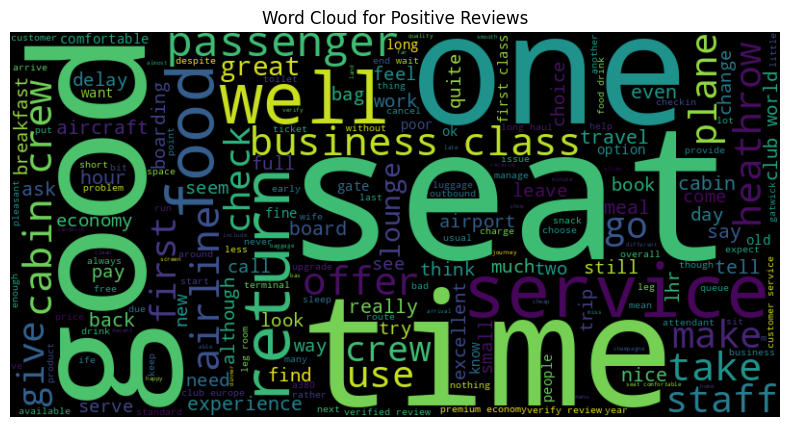

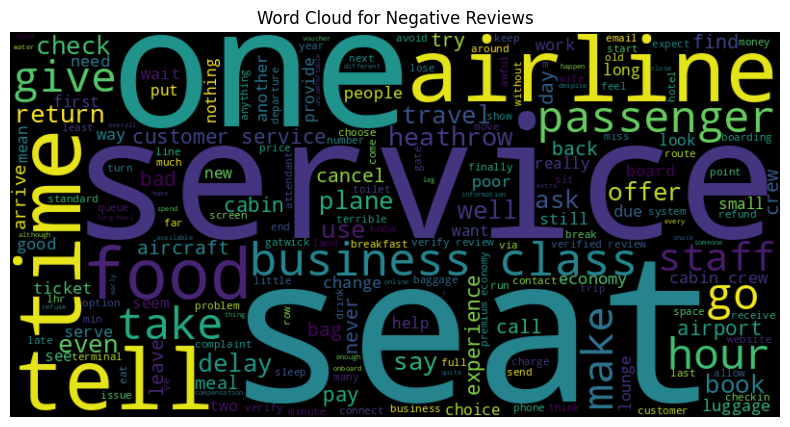

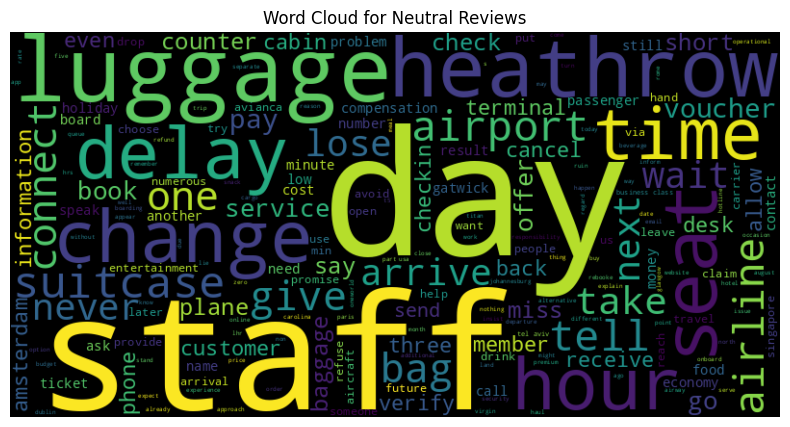

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Function to create and display word cloud
def create_wordcloud(sentiment):
    text = " ".join(df[df['sentiment_category'] == sentiment]['final_review'])
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment.capitalize()} Reviews")
    plt.show()

# Create word clouds for each sentiment category
create_wordcloud('positive')
print()
create_wordcloud('negative')
print()
create_wordcloud('neutral')

In [25]:
from gensim import corpora, models

# Create a dictionary and corpus from your cleaned reviews
texts = [review.split() for review in df['final_review']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the top words for each topic
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

Topic: 0 
Words: 0.017*"meal" + 0.012*"ask" + 0.012*"chicken" + 0.010*"serve" + 0.009*"choice" + 0.006*"pasta" + 0.006*"attendant" + 0.006*"not" + 0.006*"offer" + 0.006*"eat"

Topic: 1 
Words: 0.020*"crew" + 0.013*"check" + 0.012*"time" + 0.012*"bag" + 0.012*"boarding" + 0.011*"cabin" + 0.011*"delay" + 0.011*"minute" + 0.009*"service" + 0.009*"passenger"

Topic: 2 
Words: 0.024*"seat" + 0.012*"food" + 0.011*"service" + 0.011*"class" + 0.010*"good" + 0.010*"economy" + 0.010*"cabin" + 0.009*"business" + 0.009*"crew" + 0.007*"time"

Topic: 3 
Words: 0.018*"seat" + 0.014*"good" + 0.011*"food" + 0.011*"first" + 0.010*"not" + 0.009*"crew" + 0.009*"service" + 0.008*"well" + 0.008*"cabin" + 0.008*"time"

Topic: 4 
Words: 0.012*"get" + 0.012*"not" + 0.012*"hour" + 0.010*"tell" + 0.009*"would" + 0.009*"customer" + 0.009*"we" + 0.008*"service" + 0.008*"book" + 0.008*"could"



In [26]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 39.4 MB/s eta 0:00:00


In [27]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

import spacy

import pickle
import re
import pyLDAvis
import pyLDAvis.gensim

In [28]:
df['final_review_token'] = df.final_review.apply(lambda r: r.split(' '))
reviews = df.final_review_token.values.tolist()

id2word = Dictionary(reviews)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in reviews]

# Build LDA model
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=10,
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

doc_lda = lda_model[corpus]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=reviews, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.4240172398323995


In [30]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.176187  0.171718       1        1  40.069797
2      0.220647 -0.164547       2        1  21.706452
1      0.218775 -0.103871       3        1  18.340764
6      0.135026  0.223722       4        1   7.689544
5      0.085661 -0.114270       5        1   4.751348
0     -0.133441  0.195008       6        1   2.623465
4     -0.000551 -0.077168       7        1   2.589976
3     -0.163655 -0.009113       8        1   1.052721
9     -0.258051 -0.055050       9        1   0.664932
8     -0.280597 -0.066428      10        1   0.511000, topic_info=            Term         Freq        Total Category  logprob  loglift
84          seat  6886.000000  6886.000000  Default  30.0000  30.0000
67           not  2451.000000  2451.000000  Default  29.0000  29.0000
194         good  2835.000000  2835.000000  Default  28.0000  28.0000
340        class  1795.000000  1795.000000  Default  27.0000  27.0000
331     american  1061.000000  1061.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
2301    irritate     8.474063     9.518760  Topic10  -5.2575   5.1603
1400     release     6.625710     7.590213  Topic10  -5.5035   5.1407
1782  subsequent     6.028523     6.993359  Topic10  -5.5980   5.1281
1783     working     8.708993    12.373819  Topic10  -5.2301   4.9253
563    attentive     9.803238   286.204159  Topic10  -5.1118   1.9026

[584 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
2184       6  0.350333     14
2184       8  0.633936     14
11833      1  0.980270   2014
11833      2  0.004476   2014
11833      4  0.008952   2014
...      ...       ...    ...
111        6  0.024166  would
111        7  0.008238  would
111        8  0.005492  would
1990       3  0.986862   wrap
1265       4  0.994269   york

[1357 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 3, 2, 7, 6, 1, 5, 4, 10, 9])

In [31]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
def distilbert_classification(text):
  inputs = tokenizer(text, return_tensors="pt")
  with torch.no_grad():
    logits = model(**inputs).logits

  predicted_class_id = logits.argmax().item()
  # print(predicted_class_id)

  return "Positive" if predicted_class_id == 1 else "Negative"

df['bert_sentiment'] = df.final_review.apply(distilbert_classification)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
df[['bert_sentiment','sentiment_category']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,bert_sentiment,sentiment_category
0,Negative,positive
1,Negative,negative
2,Negative,positive
3,Negative,positive
4,Negative,positive
...,...,...
3898,Negative,positive
3899,Negative,positive
3900,Negative,positive
3901,Negative,positive


In [34]:
df['bert_sentiment'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
bert_sentiment,
Negative,2838
Positive,1065


In [36]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,reviews,cleaned_reviews,reviews_no_stopwords,lemmatized_review,final_review,sentiment,sentiment_category,final_review_token,bert_sentiment
0,0,"✅ Trip Verified | On a recent flight from Cyprus BA621 on 23/11/24, the second the cabin door was closed the pilot announced we would be held on the runway for 2 hours. They know this prior and did not inform passengers until after we had boarded. The flight home took nearly 6 hours due to weather conditions, this plus 2 hours waiting. What did BA offer during this 8 hour hell flight, 3 oatmeal biscuits and 250ml of water for our family. When I went to the cabin crew to ask for more water, which I was told there wasn’t any 3 out of the 4 cabin crew were asleep in the back row seats of the aircraft BA621 on 23/11/24. This infuriated me further as I had previously asked if there were any spare seats so that my 2 year old could spread out and get some sleep if available. I was told the flight was full. After we arrived late my connecting flight had now been missed. We then queued at the connections desk in a large queue only to watch the BA staff clock off for the night in front of us. No genuine support was given to me, or my family and we were effectively abandoned by BA. I’ve tried to speak to someone, but their helpline has an automated message saying due to the number of calls (not surprised by that aspect) they cant assist me, then hang up. Tried this several times at various times. I think it’s their default message. Have raised this via their email system. Unsurprisingly been mugged off and can’t escalate until 8 weeks have passed. Like I said a national disgrace.",on a recent flight from cyprus ba621 on 231124 the second the cabin door was closed the pilot announced we would be held on the runway for 2 hours they know this prior and did not inform passengers until after we had boarded the flight home took nearly 6 hours due to weather conditions this plus 2 hours waiting what did ba offer during this 8 hour hell flight 3 oatmeal biscuits and 250ml of water for our family when i went to the cabin crew to ask for more water which i was told there wasnt any 3 out of the 4 cabin crew were asleep in the back row seats of the aircraft ba621 on 231124 this infuriated me further as i had previously asked if there were any spare seats so that my 2 year old could spread out and get some sleep if available i was told the flight was full after we arrived late my connecting flight had now been missed we then queued at the connections desk in a large queue only to watch the ba staff clock off for the night in front of us no genuine support was given to me or my family and we were effectively abandoned by ba ive tried to speak to someone but their helpline has an automated message saying due to the number of calls not surprised by that aspect they cant assist me then hang up tried this several times at various times i think its their default message have raised this via their email system unsurprisingly been mugged off and cant escalate until 8 weeks have passed like i said a national disgrace,recent flight cyprus ba621 231124 second cabin door closed pilot announced would held runway 2 hours know prior inform passengers boarded flight home took nearly 6 hours due weather conditions plus 2 hours waiting ba offer 8 hour hell flight 3 oatmeal biscuits 250ml water family went cabin crew ask water told wasnt 3 4 cabin crew asleep back row seats aircraft ba621 231124 infuriated previously asked spare seats 2 year old could spread get sleep available told flight full arrived late connecting flight missed queued connections desk large queue watch ba staff clock night front us genuine support given family effectively abandoned ba ive tried speak someone helpline automated message saying due number calls surprised aspect cant assist hang tried several times various times think default message raised via email system unsurprisingly mugged cant escalate 8 weeks passed like said national disgra